<a href="https://colab.research.google.com/github/deethereal/MNIST/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import sys, numpy as np, matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [3]:
from skimage.io import imread,imshow


**Cтохастический градиентный спуск**

In [81]:
COUNT=1500
images, labels=(x_train[0:COUNT].reshape(COUNT,28*28)/255,y_train[0:COUNT])
#one_hot_labels=np.eye((len(labels),10))
one_hot_labels=np.zeros((len(labels),10))
for i,l in enumerate(labels):
  one_hot_labels[i][l]=1
labels=one_hot_labels
print(len(images)/100)

test_images=(x_test.reshape((len(x_test),28*28))/255)
test_labels= np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
  test_labels[i][l]=1


relu=lambda x: (x>=0)*x
relu2div=lambda x: (x>=0)

15.0


In [82]:

learning_rate, niter, hidden_size, pix_per_img, num_labels = (0.005,800,40,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  error,correct_cnt=(0.0,0)
  #print(error)
  for i in range(len(images)):
    l0=images[i:i+1]
    l1=relu(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=np.dot(l1,W12)
    
    error += np.sum((labels[i:i+1]-l2)**2)
    correct_cnt+= int(np.argmax(l2)==np.argmax(labels[i:i+1]))

    delta_l2=labels[i:i+1]-l2
    delta_l1=delta_l2.dot(W12.T)*relu2div(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/float(len(labels))   ))    
    

iter: 0 test_err: 0.6903867899836954 test_acc: 0.5993 train_err: 0.8660902036993522 train_acc: 0.332
iter: 10 test_err: 0.445102945554163 test_acc: 0.8052 train_err: 0.5560670790166157 train_acc: 0.67
iter: 20 test_err: 0.42085540886036976 test_acc: 0.822 train_err: 0.5188248859023128 train_acc: 0.694
iter: 30 test_err: 0.41031569589169914 test_acc: 0.8282 train_err: 0.510760149980612 train_acc: 0.72
iter: 40 test_err: 0.40589908905657324 test_acc: 0.8265 train_err: 0.4756324574972218 train_acc: 0.7346666666666667
iter: 50 test_err: 0.4111284512989212 test_acc: 0.8119 train_err: 0.4943963764909432 train_acc: 0.7526666666666667
iter: 60 test_err: 0.3938186033584459 test_acc: 0.8133 train_err: 0.4853545224154136 train_acc: 0.7393333333333333
iter: 70 test_err: 0.4026658037507635 test_acc: 0.8154 train_err: 0.47776132937247456 train_acc: 0.7453333333333333
iter: 80 test_err: 0.4053747470461341 test_acc: 0.8145 train_err: 0.48218144863706347 train_acc: 0.746
iter: 90 test_err: 0.4039041845

KeyboardInterrupt: ignored

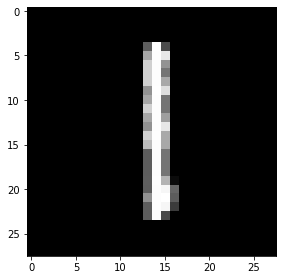

In [ ]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [ ]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

1


**Пакетный градиентный спуск** 

In [83]:
np.random.seed(1)
batch_size=75
learning_rate, niter= (0.1,300)
hidden_size, pix_per_img, num_labels = (100,784,10)
W01=0.2*np.random.random((pix_per_img,hidden_size)) - 0.1
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1
for j in range(niter):
  error, correct_cnt=(0.0,0)
  for i in range(int(len(images)/batch_size)):
    batch_start, batch_end= i*batch_size, (i+1)*batch_size

    l0=images[batch_start:batch_end]
    l1=relu(np.dot(l0,W01))
    dropout_mask=np.random.randint(2,size=l1.shape)
    l1*=dropout_mask*2
    l2=np.dot(l1,W12)

    error+=np.sum((labels[batch_start:batch_end]-l2)**2)
    for k in range(batch_size):
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))
    l2_delta=(labels[batch_start:batch_end]-l2)/(batch_size)


    l1_delta=l2_delta.dot(W12.T)*relu2div(l1)
    l1_delta*=dropout_mask

    W12+=learning_rate*l1.T.dot(l2_delta)
    W01+=learning_rate*l0.T.dot(l1_delta)
  if (j%10==0 or j==niter-1):
    test_error=0
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=relu(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_error+=np.sum((test_labels[i:i+1]-l2)**2)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_err: {} test_acc: {} train_err: {} train_acc: {}'.format(j,test_error/float(len(test_images)),test_correct_cnt/float(len(test_images)),error/float(len(labels)),correct_cnt/(float(len(labels)))   ))   


iter: 0 test_err: 0.7278960367357099 test_acc: 0.5226 train_err: 1.0925478466072518 train_acc: 0.24133333333333334
iter: 10 test_err: 0.49345430083069375 test_acc: 0.7745 train_err: 0.5487339130271487 train_acc: 0.7133333333333334
iter: 20 test_err: 0.4340764917700484 test_acc: 0.8098 train_err: 0.4882984841680627 train_acc: 0.748
iter: 30 test_err: 0.41211949383458457 test_acc: 0.8103 train_err: 0.4681544042483485 train_acc: 0.786
iter: 40 test_err: 0.40165922960461575 test_acc: 0.8145 train_err: 0.4428957364507865 train_acc: 0.7933333333333333
iter: 50 test_err: 0.396620226510431 test_acc: 0.8149 train_err: 0.44280889357562025 train_acc: 0.7993333333333333
iter: 60 test_err: 0.40216992821679687 test_acc: 0.8128 train_err: 0.44690615134721756 train_acc: 0.7906666666666666
iter: 70 test_err: 0.3993624691772126 test_acc: 0.8118 train_err: 0.4375411378624929 train_acc: 0.816
iter: 80 test_err: 0.38961590433373744 test_acc: 0.8198 train_err: 0.42819225609418854 train_acc: 0.804
iter: 90 t

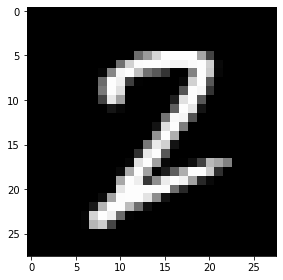

In [51]:
ix=np.random.randint(len(x_test))
imshow(x_test[ix])

In [52]:
inpt=x_test[ix].reshape(28*28)/255
pred=np.dot(relu(np.dot(inpt,W01)),W12)
print(np.argmax(pred))

2


**Улучшаем пакетного градинетного спуска**


In [4]:
def tanh(x):
  return np.tanh(x)
def div_tanh(x):
  return 1-(x**2)
def softmax(x):
  temp=np.exp(x)
  return temp/np.sum(temp,axis=1,keepdims=True)

In [58]:
print(labels[15])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [109]:

batch_size=75
learning_rate, niter= (2.0,301)
hidden_size, pix_per_img, num_labels = (100,784,10)

W01=0.02*np.random.random((pix_per_img,hidden_size)) - 0.01
W12=0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(niter):
  correct_cnt=0
  for i in range((len(images/batch_size))//batch_size):
    batch_start,batch_end=(i*batch_size,(i+1)*batch_size)
    l0=images[batch_start:batch_end]
    l1=tanh(np.dot(l0,W01))
    drop_out_mask=np.random.randint(2,size=l1.shape) #распределение бернули: выключеаем 50% нейронов
    l1*=drop_out_mask*2
    l2=softmax(np.dot(l1,W12))
    #print(l2)
    for k in range(batch_size):
      #correct_cnt+=int(    np.argmax(labels[batch_start+k:batch_start+k+1]) == np.argmax(l2[k:k+1])       )
      correct_cnt+=int(np.argmax(l2[k:k+1])==np.argmax(labels[batch_start+k:batch_start+k+1]))

    delta_l2=(labels[batch_start:batch_end]-l2)/(batch_size*l2.shape[0])
    delta_l1=delta_l2.dot(W12.T)*div_tanh(l1)
    delta_l1*=drop_out_mask

    W12+=learning_rate*l1.T.dot(delta_l2)
    W01+=learning_rate*l0.T.dot(delta_l1)


  if (j%10==0 or j==niter-1):
    test_correct_cnt=0
    for i in range(len(test_images)):
      l0=test_images[i:i+1]
      l1=tanh(np.dot(l0,W01))
      l2=np.dot(l1,W12)
      test_correct_cnt+=int(np.argmax(test_labels[i:i+1])==np.argmax(l2))
    print('iter: {} test_acc: {} train_acc: {}'.format(j,test_correct_cnt/float(len(test_images)),correct_cnt/float(len(labels))   ))    

iter: 0 test_acc: 0.6474 train_acc: 0.32266666666666666
iter: 10 test_acc: 0.7372 train_acc: 0.7366666666666667
iter: 20 test_acc: 0.8084 train_acc: 0.82
iter: 30 test_acc: 0.8406 train_acc: 0.8593333333333333
iter: 40 test_acc: 0.8531 train_acc: 0.8846666666666667
iter: 50 test_acc: 0.8621 train_acc: 0.89
iter: 60 test_acc: 0.8682 train_acc: 0.896
iter: 70 test_acc: 0.873 train_acc: 0.902
iter: 80 test_acc: 0.8769 train_acc: 0.9073333333333333
iter: 90 test_acc: 0.88 train_acc: 0.9173333333333333
iter: 100 test_acc: 0.8812 train_acc: 0.9193333333333333
iter: 110 test_acc: 0.8832 train_acc: 0.9193333333333333
iter: 120 test_acc: 0.886 train_acc: 0.922
iter: 130 test_acc: 0.8864 train_acc: 0.9246666666666666
iter: 140 test_acc: 0.8854 train_acc: 0.9286666666666666
iter: 150 test_acc: 0.8867 train_acc: 0.926
iter: 160 test_acc: 0.8887 train_acc: 0.93
iter: 170 test_acc: 0.8896 train_acc: 0.932
iter: 180 test_acc: 0.8915 train_acc: 0.926
iter: 190 test_acc: 0.8916 train_acc: 0.93133333333

In [110]:
def pred_nn(ix,w1,w2):
  imshow(x_test[ix])
  plt.show()
  inpt=x_test[ix].reshape(28*28)/255
  pred=(np.dot(tanh(np.dot(inpt,w1)),w2))
  return(np.argmax(pred))

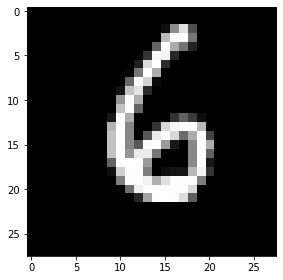

Neural Network thinks this is: 6


In [113]:
ix=np.random.randint(len(x_test))
print("Neural Network thinks this is:" ,pred_nn(ix,W01,W12))